# Prob. 1 #

#### Check the pdf file. Analysis is in that file because it did not need python codes.

# Prob. 2#

In [ ]:
# Firstly, we import the libraries we need.
import pandas as pd
import numpy as np

In [ ]:
tips = pd.read_csv("tips.csv") # reading the data. Note that the data is uploaded in the google colab file.
tips_df = tips.copy()
tips.head() # in order to know the data and its attributes better, we look at its 5 first rows.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,2.52,Female,No,Sun,Dinner,3
1,10.34,1.91,Male,No,Sun,Dinner,1
2,21.01,2.66,Male,No,Sun,Dinner,1
3,23.68,3.50,Male,No,Sun,Dinner,1
4,24.59,1.82,Female,No,Sun,Dinner,4


In [ ]:
tips.describe() # We also use this method to get more familiar with our numeric attributes.

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998361,2.987705
std,8.902412,1.386293,1.412704
min,3.070000,-0.470000,1.000000
25%,13.347500,1.970000,2.000000
50%,17.795000,2.935000,3.000000
75%,24.127500,4.145000,4.000000
max,50.810000,7.650000,5.000000


#### Question 1

In [ ]:
# Firstly, we calculate required measures for total_bill attribute.
total_bill_mean = tips_df["total_bill"].mean()
total_bill_median = tips_df["total_bill"].median()
total_bill_mode = tips_df["total_bill"].mode()[0]
total_bill_range = tips_df["total_bill"].max() - tips_df["total_bill"].min()  # There is not a specific function for range, so we use max - min.
total_bill_var = tips_df["total_bill"].var()
total_bill_std = tips_df["total_bill"].std()


In [ ]:
# Then, we calculate required measures for total_bill attribute.
tip_mean = tips_df["tip"].mean()
tip_median = tips_df["tip"].median()
tip_mode = tips_df["tip"].mode()[0]
tip_range = tips_df["tip"].max() - tips_df["total_bill"].min()
tip_var = tips_df["tip"].var()
tip_std = tips_df["tip"].std()

In [ ]:
# In order to show it in a neater way, we put all the calculated measures into a new dataframe.
data = {
    'measures': ['mean', 'median', 'mode', 'range', 'variance', 'standard deviation'],
    'total_bill': [total_bill_mean,total_bill_median, total_bill_mode, total_bill_range, total_bill_var, total_bill_std],
    'tip': [tip_mean, tip_median,tip_mode, tip_range, tip_var, tip_std]
}

StatisticsMeasures_df = pd.DataFrame(data)
StatisticsMeasures_df.set_index('measures', inplace=True)
StatisticsMeasures_df

,total_bill,tip
measures,,
mean,19.785943,2.998361
median,17.795000,2.935000
mode,13.420000,1.820000
range,47.740000,4.580000
variance,79.252939,1.921810
standard deviation,8.902412,1.386293


#### Question 2

In [ ]:
# Runnig a test to see if skewness exists.
from scipy.stats import skewtest
stat, p_value = skewtest(tips_df["tip"])
print("Skewness stat: ", stat)
print("P-value: ", p_value)

Skewness stat:  1.0585242280120504
P-value:  0.28981651111233464


#### Question 3

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

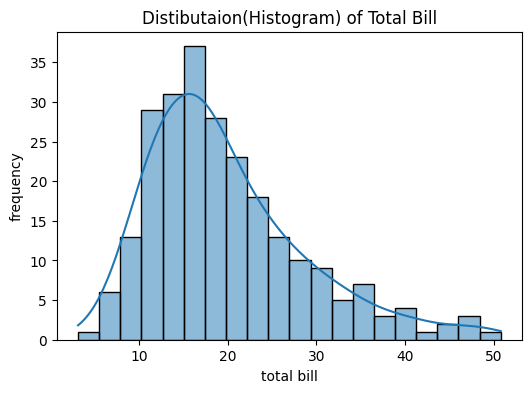

In [ ]:
# depicting distribution of the attribute using histogram
plt.figure(figsize=(6, 4))
sns.histplot(tips_df['total_bill'], bins=20, kde=True)
plt.title("Distibutaion(Histogram) of Total Bill")
plt.xlabel("total bill")
plt.ylabel("frequency")
plt.show()

In [ ]:
# Runninga test to see if the datas of the attribute follow normal distribution.
from scipy.stats import shapiro
stat, p_value = shapiro(tips_df["total_bill"])
print("Shapiro stat: ", stat)
print("P-value: ", p_value)

Shapiro stat:  0.9197187941346584
P-value:  3.3245391868090786e-10


#### Question 4

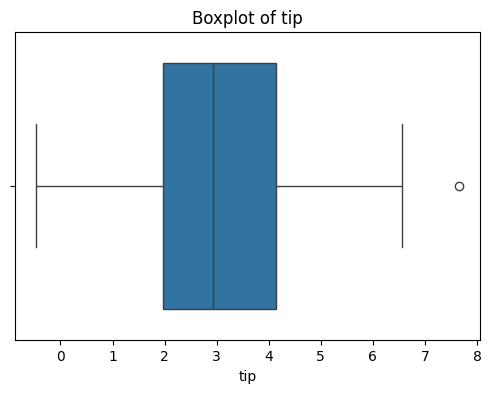

In [ ]:
# depicting box plot of tip attribute
plt.figure(figsize=(6, 4))
sns.boxplot(x=tips_df["tip"])
plt.title("Boxplot of tip")
plt.show()

In [ ]:
# Calculate the IQR and bounds
tip_Q1 = tips_df["tip"].quantile(0.25)
tip_Q3 = tips_df["tip"].quantile(0.75)
tip_IQR = tip_Q3 - tip_Q1
tip_lower_bound = tip_Q1 - 1.5 * tip_IQR
tip_upper_bound = tip_Q3 + 1.5 * tip_IQR

# Identify outliers
tip_outliers = tips_df[(tips_df["tip"] < tip_lower_bound) | (tips_df["tip"] > tip_upper_bound)]
tip_outliers


,total_bill,tip,sex,smoker,day,time,size
209,12.76,7.65,Female,Yes,Sat,Dinner,1


#### Question 5

<Figure size 600x400 with 0 Axes>

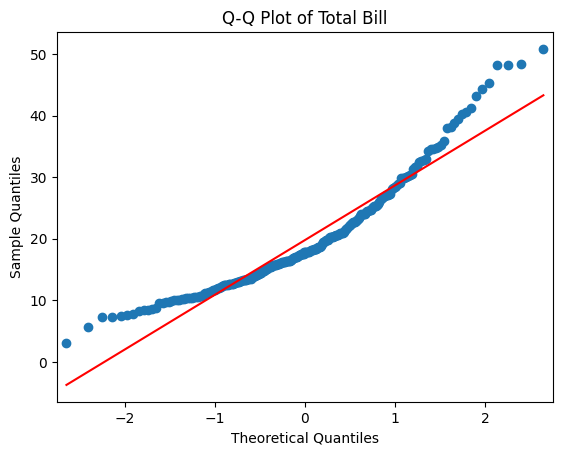

In [ ]:
# First we import the library which is needed for QQplot.
import statsmodels.api as sm

# Then we draw the plot.
plt.figure(figsize=(6, 4))
sm.qqplot(tips_df['total_bill'], line='s')
plt.title("Q-Q Plot of Total Bill")
plt.show()


#### Question 6

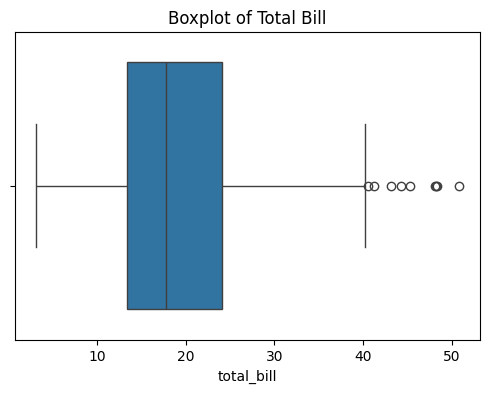

In [ ]:
# depicting box plot of total_bill attribute for further insights
plt.figure(figsize=(6, 4))
sns.boxplot(x=tips_df["total_bill"])
plt.title("Boxplot of Total Bill")
plt.show()

In [ ]:
# calculate IQR and bounds
total_bill_Q1 = tips_df['total_bill'].quantile(0.25)
total_bill_Q3 = tips_df['total_bill'].quantile(0.75)
total_bill_IQR = total_bill_Q3 - total_bill_Q1
total_bill_lower_bound = total_bill_Q1 - 1.5 * total_bill_IQR
total_bill_upper_bound = total_bill_Q3 + 1.5 * total_bill_IQR

# Identify outliers
total_bill_outliers = tips_df[(tips_df['total_bill'] > total_bill_upper_bound) | (tips_df['total_bill'] < total_bill_lower_bound)]
total_bill_outliers

,total_bill,tip,sex,smoker,day,time,size
59,48.27,2.98,Male,No,Sat,Dinner,1
102,44.30,1.71,Female,Yes,Sat,Dinner,2
142,41.19,2.42,Male,No,Thur,Lunch,5
156,48.17,5.74,Male,No,Sun,Dinner,4
170,50.81,3.10,Male,Yes,Sat,Dinner,3
182,45.35,2.93,Male,Yes,Sun,Dinner,4
184,40.55,3.74,Male,Yes,Sun,Dinner,4
197,43.11,4.10,Female,Yes,Thur,Lunch,4
212,48.33,4.87,Male,No,Sat,Dinner,3


# Prob. 3 #




In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

In [ ]:
df = pd.read_csv("physical_characteristics.csv")

#### Question 1

In [ ]:
selected_columns = ["Age", "Weight (kg)", "Height (cm)"]
# euclidean distance calculation
row1 = df.loc[95, selected_columns].values
row2 = df.loc[4, selected_columns].values

euclidean_distance = np.linalg.norm(row1 - row2)
print("Euclidean Distance:", euclidean_distance)

Euclidean Distance: 37.66579482766824


#### Question 2

In [ ]:
selected_columns = ["Age", "Weight (kg)", "Height (cm)"]
df[selected_columns] = df[selected_columns].apply(zscore)

# standardize selected columns

In [ ]:
columns = ["PersonID","Age", "Weight (kg)", "Height (cm)"]
print(df.loc[[95, 4], columns])

    PersonID       Age  Weight (kg)  Height (cm)
95        96  1.197358     0.737807     0.059573
4          5 -1.029971     0.855912     1.212602


In [ ]:
# euclidean distance calculation
row1 = df.loc[95, selected_columns].values
row2 = df.loc[4, selected_columns].values

euclidean_distance = np.linalg.norm(row1 - row2)
print("Euclidean Distance:", euclidean_distance)

Euclidean Distance: 2.5108603540220713


#### Question 3

In [ ]:
# First we get all unique datas in given columns.
EyeColor_unique_values = df['Eye Color'].unique()
EyeColor_unique_values

array(['Hazel', 'Blue', 'Gray', 'Brown', 'Green'], dtype=object)

In [ ]:
HairColor_unique_values = df['Hair Color'].unique()
HairColor_unique_values

array(['Black', 'Red', 'Gray', 'Brown', 'Blonde'], dtype=object)

In [ ]:
BodyType_unique_values = df['Body Type'].unique()
BodyType_unique_values

array(['Overweight', 'Average', 'Athletic', 'Slim'], dtype=object)

In [ ]:
# By using OneHotEncoder, we convert nominal variables to binary ones.
# person id = 5
eye_5_array = np.array([0,0,0,0,1])
hair_5_array = np.array([1,0,0,0,0])
body_5_array = np.array([0,1,0,0])

In [ ]:
d_2 = np.array([0,0,0,0,1,1,0,0,0,0,0,1,0,0])
d_2

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
# By using OneHotEncoder, we convert nominal variables to binary ones.
# person id = 96
eye_96_array = np.array([0,1,0,0,0])
hair_96_array = np.array([1,0,0,0,0])
body_96_array = np.array([0,1,0,0])

In [ ]:
d_1 = np.array([0,1,0,0,0,1,0,0,0,0,0,1,0,0])
d_1

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

#### Question 5

In [17]:
# First we write the rows
record_96 = {"Average", "Black", "Blue"}
record_5 = {"Average", "Black", "Green"}

# Then we caclcute their intersection and union
intersection = record_96.intersection(record_5)
union = record_96.union(record_5)

# Then we calculate the similarity ans dissimilarity.
jaccard_similarity = len(intersection) / len(union)
jaccard_distance = 1 - jaccard_similarity

print("Jaccard Similarity:", jaccard_similarity)
print("Jaccard Distance:", jaccard_distance)


Jaccard Similarity: 0.5
Jaccard Distance: 0.5


# Prob. 4#

#### Question 1

In [ ]:
import pandas as pd

#First we read the data.
df = pd.read_csv("physical_characteristics.csv")

# Then using pandas' methods, we create contigency table.
contingency_table = pd.crosstab(df['Body Type'], df['Gender'])
contingency_table.loc['Total'] = contingency_table.sum(axis=0)
contingency_table['Total'] = contingency_table.sum(axis=1)

print(contingency_table)


Gender      Female  Male  Total
Body Type                      
Athletic        13    12     25
Average         16    11     27
Overweight      11    12     23
Slim            11    14     25
Total           51    49    100


In [ ]:
# In order to implement the test, we import needed library.
from scipy.stats import chi2_contingency


In [ ]:
# test implementation
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

Chi-Square Statistic: 1.3299361612599956
P-Value: 0.9951847612442957
Degrees of Freedom: 8
Expected Frequencies Table:
Gender      Female   Male  Total
Body Type                       
Athletic     12.75  12.25   25.0
Average      13.77  13.23   27.0
Overweight   11.73  11.27   23.0
Slim         12.75  12.25   25.0
Total        51.00  49.00  100.0
